In [ ]:
# default_exp advantages

# Advantages of Jupyter

> Here we summarize the advantages of jupyter notebooks

## Mixing code with rich documentation 
"<b>Literate programming</b> is a methodology that combines a programming language with a documentation language, thereby making programs more robust, more portable, more easily maintained, and arguably more fun to write [...]. The main idea is to treat a program as a piece of literature, addressed to human beings rather than to a computer." (Donald E. Knuth, 1992)

### Images

<img src="images/like_notebooks.png" width="400" height="400">

For a better summary of the advantages of Jupyter, watch [this video](https://www.youtube.com/watch?v=9Q6sLbz37gk) by Jeremy Howard.

### Latex
$\text{New}Q(s,a)=Q(s,a)+\mkern-30mu\underset{\text{New Q-Value}}{\underset{\Bigl|}{\alpha}}\mkern-22mu[\mkern-3mu\underbrace{R(s,a)}_{\scriptstyle\text{Reward}}+\mkern-30mu\underset{\text{Discount rate}}{\underset{\Biggl|}{\mkern+5mu\gamma}}\mkern-75mu\overbrace{\max Q'(s',a')}^{\scriptstyle\substack{\text{Maximum predicted reward, given new state}\\\text{and all possible actions}}}\mkern-55mu-Q(s,a)]$

### HTML

In [ ]:
from IPython.display import HTML
# you only change video ID : 'TNzDMOg_zsw' , and width and height as you want
display(HTML('<iframe class="center" width="560" height="315" src="https://www.youtube.com/embed/yMk_XtIEzH8?rel=0&amp;controls=0&amp;showinfo=0" frameborder="1" allowfullscreen></iframe>'))

### Automatic table of contents
#### Third level heading example

## Reporting results in the same document plotting
Allows to present analyses while you're working on them.

1) Installing the necessary packages (you only need to do this once per environment)

In [ ]:
#!mamba install pandas -y -q
#!mamba install fastparquet -y -q
#!mamba install matplotlib -y -q
#!mamba install seaborn -y -q

2. Plotting 

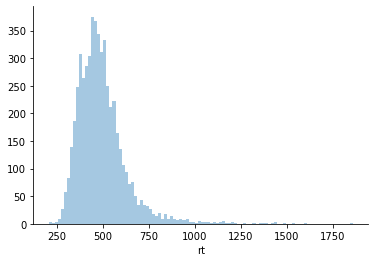

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_parquet('../data/external/example_data.parquet', columns = ['participant','rt'])
sns.distplot(df.rt, kde = False, bins = 100, color = sns.color_palette()[0])
sns.despine()

## Mixing of languages in same analysis pipeline (e.g. Python, R).
Matlab requires separate notebook, as far as I know.

Installing Python-to-R interface

In [ ]:
#!mamba install rpy2 -y -q

Enabling Python-to-R interface (Note Magic function)

In [ ]:
%reload_ext rpy2.ipython

Loading data (Python)

In [ ]:
df = pd.read_parquet('../data/external/example_data.parquet', columns = ['participant','is_pull_c','is_food_c','rt'])

Installing some R-packages

In [ ]:
#!mamba install r-lme4 -y -q
#!mamba install r-lmerTest -y -q

Moving data to R, running mixed model, moving random_effects to Python

In [ ]:
%%R -i df -o random_effects
require(lme4)
require(lmerTest)
m = lmer(1/rt ~ is_pull_c * is_food_c + (1 | participant), data = df)
random_effects <- ranef(m)$participant 
print(summary(m))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 1/rt ~ is_pull_c * is_food_c + (1 | participant)
   Data: df

REML criterion at convergence: -68031.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1534 -0.6476 -0.0345  0.6088  5.5019 

Random effects:
 Groups      Name        Variance  Std.Dev. 
 participant (Intercept) 6.400e-08 0.0002530
 Residual                1.892e-07 0.0004349
Number of obs: 5401, groups:  participant, 48

Fixed effects:
                     Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)         2.141e-03  3.705e-05 4.732e+01  57.791  < 2e-16 ***
is_pull_c           3.409e-05  1.260e-05 5.350e+03   2.705  0.00686 ** 
is_food_c           1.364e-04  1.260e-05 5.350e+03  10.821  < 2e-16 ***
is_pull_c:is_food_c 2.074e-04  2.521e-05 5.350e+03   8.226 2.42e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr) is_pl_ is_

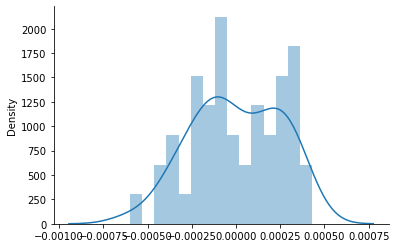

In [ ]:
sns.distplot(random_effects, bins = 15)
sns.despine()

Mixing Python and R in the same function:

In [ ]:
def mixed_python_and_r(x):
    y = x + 2
    %R print(y) -i y
    
mixed_python_and_r(6)

[1] 8


## Easy export to html, pdf, latex, etc
- You can even publish [books](https://books.google.gr/books?id=yATuDwAAQBAJ&printsec=frontcover&hl=el&source=gbs_ge_summary_r&cad=0#v=onepage&q&f=false) based on Jupyter notebooks.